In [3]:
%load_ext autoreload
%autoreload 2

In [61]:
import os
import numpy as np
from load_quilt_data import load_data
from pylab import *

In [5]:
node = 'pointwise_clusters_test'
typ = 'pointwiseclusters'

X, Y1, Y2, meta = load_data(node, typ)

In [6]:
X[0], Y1[0], Y2[0], meta[0]

([[0.0, 1.0, 11.7003, 1.0],
  [36.0, 1.0, 15.6004, 1.0],
  [67.0, 1.0, 16.9004, 1.0],
  [90.0, 1.0, 10.4002, 0.0],
  [120.0, 1.0, 16.9004, 0.0],
  [138.0, 1.0, 11.7003, 0.0],
  [157.0, 1.0, 15.6004, 0.0],
  [176.0, 0.0, 11.7003, 1.0],
  [193.0, 0.0, 10.4002, 1.0],
  [220.0, 0.0, 15.6004, 1.0],
  [251.0, 0.0, 10.4002, 0.0],
  [270.0, 0.0, 11.7003, 0.0],
  [1225.0, 1.0, 11.7003, 1.0],
  [1287.0, 1.0, 11.7003, 0.0],
  [1356.0, 0.0, 11.7003, 1.0],
  [1376.0, 0.0, 13.0003, 1.0],
  [1425.0, 0.0, 13.0003, 0.0],
  [1444.0, 0.0, 11.7003, 0.0],
  [1466.0, 1.0, 16.9004, 1.0],
  [1485.0, 1.0, 15.6004, 1.0],
  [1543.0, 1.0, 15.6004, 0.0],
  [1562.0, 1.0, 16.9004, 0.0],
  [1634.0, 0.0, 16.9004, 1.0],
  [1682.0, 0.0, 15.6004, 1.0],
  [1750.0, 0.0, 16.9004, 0.0],
  [4762.0, 1.0, 2.60006, 1.0],
  [4785.0, 1.0, 1.30003, 1.0],
  [4806.0, 1.0, 6.50015, 1.0],
  [4824.0, 1.0, 5.20012, 1.0],
  [4862.0, 1.0, 1.30003, 0.0],
  [4880.0, 1.0, 2.60006, 0.0],
  [4898.0, 1.0, 5.20012, 0.0],
  [4917.0, 1.0, 6.50015, 

In [95]:
def plot_sensor_data(x_data, y1):
    
    y1_a = np.unique(np.asarray(y1))
    n = len(y1_a)
    colors = ['b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r',
              'b','g','y','r','b','g','y','r','b','g','y','r','b','g','y','r','b','g','y','r','b','g','y','r']
    color = colors[:n]
    print(len(color))
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111) 
    
    #subplots
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
    
    #plot according to push/release and which sensor
    for x, y in zip(x_data, y1):
        if y == 10 or y == 9 or y == 8:
            if x[1] == 0:
                if x[3] == 0:
                    ax1.plot(x[0], x[2], 'o', marker='o', color = color[y], fillstyle = 'none')
                else:
                    ax1.plot(x[0], x[2], 'bo', marker = 'o', color = color[y])
            else: 
                if x[3] == 0:
                    ax2.plot(x[0], x[2], 'o', marker='o', color = color[y], fillstyle = 'none')
                else:
                    ax2.plot(x[0], x[2], 'bo', marker = 'o', color = color[y])
    
    # turn off spines and labels of overlayed plot (for the shared axes)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    ax1.tick_params(labelcolor='w', top='off', bottom='off', right='off', labelbottom = 'off',  labelsize = 16)
    ax1.tick_params(labelcolor='black', left = 'on')
    ax1.set_ylim([0, 14])
    ax2.set_ylim([0, 14])
    ax2.tick_params(labelsize = 16)
    # Set common labels
    ax.set_xlabel('time[ms]', size = 16, labelpad=20)
    ax.set_ylabel('segment[1/3m]', size = 16, labelpad=20)

    #plt.suptitle('Prediction: '+str(wrong_y_pred)+' True value: '+str(y_true)+ ('\n0= Car in, 1= Car out, 2= Motorcycle, 3= Pedestrian'), va = 'bottom')
    plt.show()

11


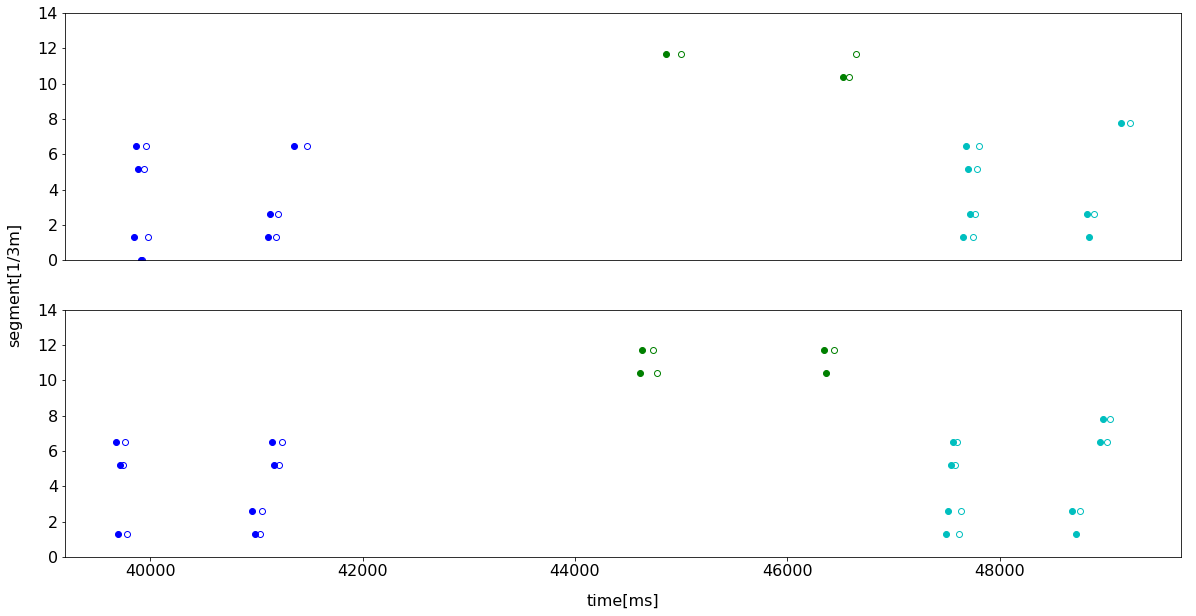

In [96]:
plot_sensor_data(X[0],Y1[0])

In [ ]:
#Look for unique clusters in foundclusters
unique_pos = []
unique_clusters = []
for cl_position, foundcluster in zip(cl_positions, foundclusters):
    if foundclusters.count(foundcluster) == 1:
        unique_pos.append(cl_position)
        unique_clusters.append(foundcluster)

In [310]:
#How long are clusters in Xc?
lens = []
for cluster, output in zip(Xc, Y2c):
    if output != 0:
        #print(len(cluster))
        lens.append(len(cluster))
lens.sort()
print(lens[1:1000])
print(min(lens))

[8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 